## 10-1 차원축소

주성분 분석
+ 장점 : 고차원 데이터를 손실을 최소화하면서 효율적으로 축소 가능
+ 단점 : 축을 해석하기 어려움, 선형변환의 한계로써 데이터의 비선형 구조를 반영하지 못함

In [26]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
X = pd.DataFrame(data['data'], columns= data['feature_names'])
y = data['target']

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# PCA 적합
from sklearn.decomposition import PCA
model = PCA(n_components= X.shape[1], svd_solver='auto') # 전체 feature 수를 입력
model.fit(X_scaled)

e_value = pd.DataFrame({'고유값' : model.explained_variance_, '기여율' : model.explained_variance_ratio_},
                       index = [f'comp{i}' for i in range(1, X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print(e_value)

             고유값       기여율     누적기여율
comp1   4.732437  0.361988  0.361988
comp2   2.511081  0.192075  0.554063
comp3   1.454242  0.111236  0.665300
comp4   0.924166  0.070690  0.735990
comp5   0.858049  0.065633  0.801623
comp6   0.645282  0.049358  0.850981
comp7   0.554141  0.042387  0.893368
comp8   0.350466  0.026807  0.920175
comp9   0.290512  0.022222  0.942397
comp10  0.252320  0.019300  0.961697
comp11  0.227064  0.017368  0.979066
comp12  0.169724  0.012982  0.992048
comp13  0.103962  0.007952  1.000000


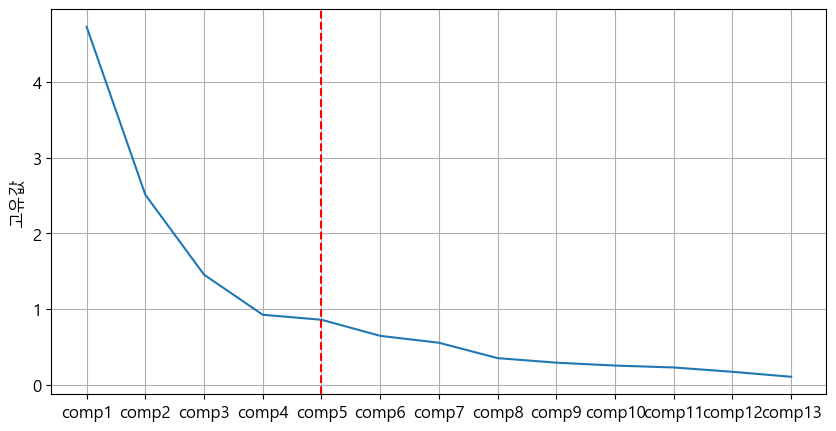

In [35]:
# 고유값 scree plot

import seaborn as sns
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

fig, ax = plt.subplots(1,1, figsize = (10, 5))
sns.lineplot(x = e_value.index, y = '고유값', data = e_value, markers= 'o', ax = ax)
ax.grid()

for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls = '--', color = 'red')
        best_dim = i+1
        break

plt.show()

In [43]:
# 차원 축소하여 PCA 적합
model = PCA(n_components=best_dim, svd_solver='auto') # best_dim 입력
model.fit(X_scaled)
PCA_result = model.fit_transform(X_scaled)

# 고유벡터 요약
e_vector = pd.DataFrame(model.components_, index = [f'comp{i}' for i in range(1, best_dim+1)], columns= X_scaled.columns)
print(e_vector)

        alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
comp1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
comp2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   
comp3 -0.207383    0.089013  0.626224           0.612080   0.130757   
comp4 -0.017856    0.536890 -0.214176           0.060859  -0.351797   
comp5 -0.265664    0.035214 -0.143025           0.066103   0.727049   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
comp1       0.394661    0.422934             -0.298533         0.313429   
comp2      -0.065040    0.003360             -0.028779        -0.039302   
comp3       0.146179    0.150682              0.170368         0.149454   
comp4       0.198068    0.152295             -0.203301         0.399057   
comp5      -0.149318   -0.109026             -0.500703         0.136860   

       color_intensity       hue  od280/od315_of_diluted_wines   proline  
comp1        -0.088617  0.296715               

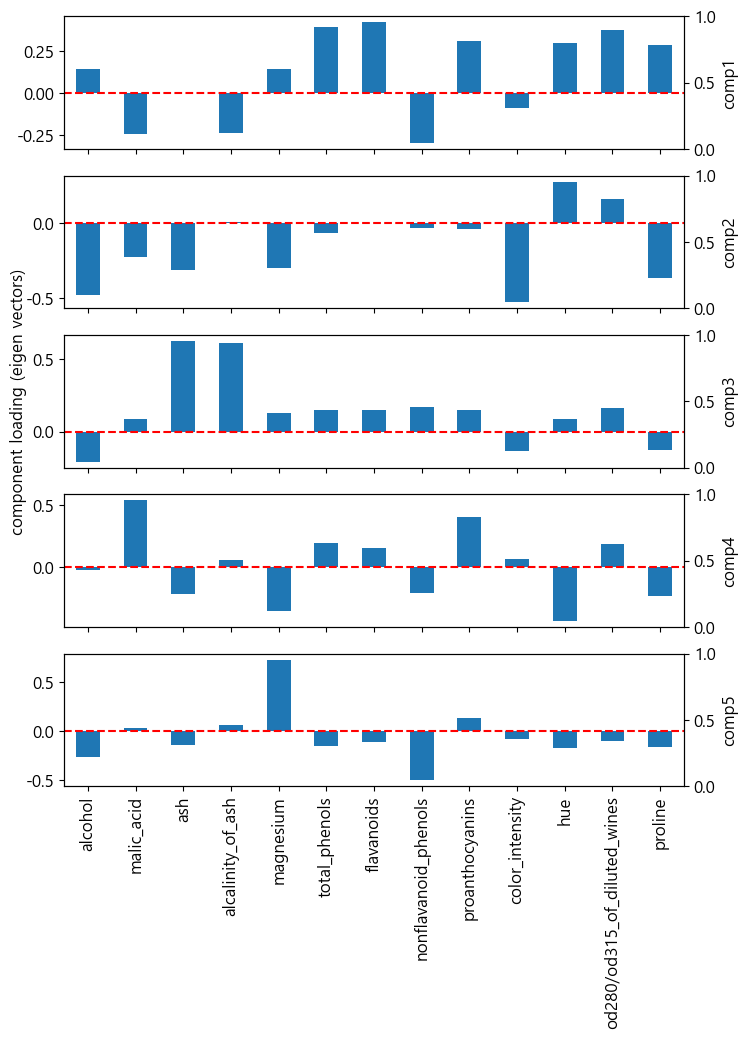

In [59]:
# 고유벡터 plot : feature 의 고유벡터값이 클수록 해당 주성분에 많은 영향을 주는 feature 임
fig, axes = plt.subplots(best_dim,1, figsize = (8, 10))
for i, ax in enumerate(axes):
    e_vector.iloc[i, :].plot.bar(ax =ax, rot = 90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([' ' for i in range(len(e_vector.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i])
    ax.axhline(y = 0, linestyle = 'dashed', color = 'red')

ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns))
axes[round(best_dim/2)].set_ylabel('component loading (eigen vectors)')

plt.show()

In [ ]:
!pip install pca

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


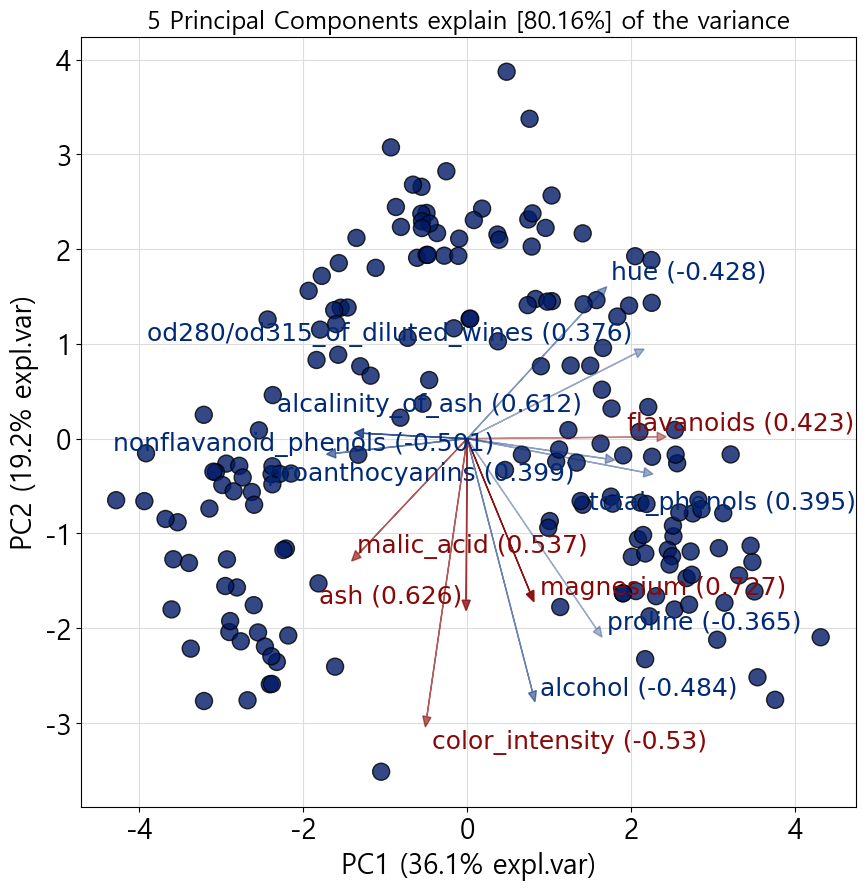

In [71]:
# bioplot 을 통한 PCA 결과 해석

from pca import pca
model = pca(n_components=5)
model.fit_transform(X_scaled)
fig, ax = model.biplot(n_feat = X_scaled.shape[1], legend = False, figsize = (10, 10))
plt.show()
plt.close()

요인 분석

In [72]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
X = pd.DataFrame(data['data'], columns= data['feature_names'])
y = data['target']

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [75]:
# FA 적합
from sklearn.decomposition import FactorAnalysis
best_dim = 5 # 잠재변수 5개
model = FactorAnalysis(n_components=best_dim)
model.fit(X_scaled)
FA_result = model.transform(X_scaled)

# 각 잡재요인의 feature별 최대 분산
max_var = pd.DataFrame(model.components_ , index = [f'latent{i}' for i in range(1, best_dim+1)],
                       columns = X_scaled.columns)
max_var

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
latent1,0.299731,-0.424489,0.143386,-0.387691,0.275096,0.883819,0.964917,-0.554122,0.657893,-0.154977,0.570742,0.803164,0.581277
latent2,-0.423886,-0.283977,-0.866066,-0.364116,-0.409356,-0.026124,0.044955,-0.214042,0.037284,-0.588489,0.307715,0.225350,-0.336065
latent3,-0.576480,-0.039512,0.368996,0.537425,-0.228729,-0.035148,0.047046,0.178719,-0.062089,-0.597359,0.251566,0.215893,-0.470360
latent4,-0.117865,-0.148264,-0.013634,-0.073661,0.668697,-0.107851,-0.077815,-0.172425,-0.011827,-0.248474,0.222003,0.003696,0.085419
latent5,-0.194167,0.157465,-0.071648,0.239827,0.209583,0.096661,0.060824,-0.130692,0.285620,0.158815,-0.329971,-0.049456,-0.317941


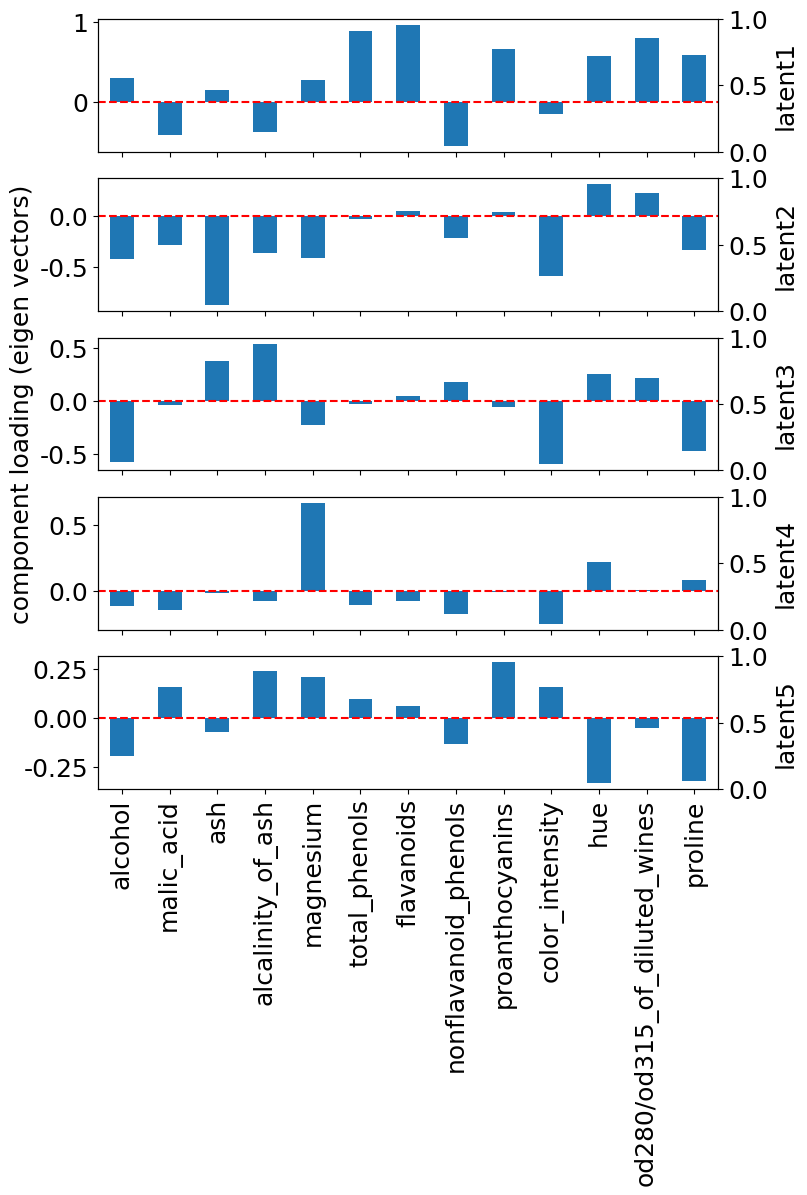

In [76]:
# 각 잠재요인이 feature 별 최대 분산 시각화
fig, axes = plt.subplots(best_dim,1, figsize = (8, 10))
for i, ax in enumerate(axes):
    max_var.iloc[i, :].plot.bar(ax =ax, rot = 90)
    ax.set_xticks(list(range(len(max_var.columns))))
    ax.set_xticklabels([' ' for i in range(len(max_var.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(max_var.index[i])
    ax.axhline(y = 0, linestyle = 'dashed', color = 'red')

ax.set_xticks(list(range(len(max_var.columns))))
ax.set_xticklabels(list(max_var.columns))
axes[round(best_dim/2)].set_ylabel('component loading (eigen vectors)')

plt.show()

독립성분 분석